# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

Ames is a city in Story County, Iowa, United States, located approximately 30 miles (48 km) north of Des Moines in central Iowa. 
It is best known as the home of Iowa State University (ISU), with leading agriculture, 
design, engineering, and veterinary medicine colleges.In 2020, Ames had a population of 66,772 .

This project analyses the housing dataset of Ames in Iowa, USA. The dataset is obtained from Kaggle[Link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data). 
People often invest in remodelling to increase value of the house and don't get much return on investment when selling the house. Likewise, people looking to buy houses want to get the best house within their budget. 

I will use the housing data collected from Kaggle to build a Linear Regression model that best predicts sale prices for properties located in Ames.

# Executive Summary

This dataset provides 80 features (of nominal, discrete, and ordinal types) to describe properties in Ames, Iowa that were sold between the years 2006-2010. During the first step in the analysis - data cleaning, missing values were fixed, incorrect data types were fixed, and any unsual values were also investigated and fixed. Once the data was cleaned, Exploratory Data Analysis (EDA) was conducted to explore the relationship between Sale Price and each feature in the model. For numeric features, the linear relationship was examined using a heatmap and correlation coefficients. For categorical data, bar plots were created to visualize the mean Sale Price across categories. 
Following EDA, features were engineered to reduce dimensionality of the data and to account for the patterns and clusters that emerged during EDA. Categorical variables of were encoded. 
During modeling, three models were built:  a Linear Regression, Ridge Regression and Lasso Regression. The models were compared based on R2 score, and the highest scoring model was selected for further evaluation using RMSE and residuals plots. Interpretations and recommendations were made based off of the best-performing model.

Based on the findings,

Square feet area, property age, Overall conditions and location are the most important determinant factors of Saleprice.

Best locations are - Northridge Heights, Stone Brook and Northridge.

People looking to sell should do it sooner rather than later.

To increase the value of a home:
- Renovate the kitchen
- Remodel the interior and exterior finish
- Add fireplace(if not present)
- Renovate Garage
- Renovate house if not in good condition


# Contents

* [Imports](#Imports)
* [Read-in data](#Read-in-Data)
* [Data Dictionary](#Data-Dictionary)
* [Data Cleaning](#Data-Cleaning)
  * [Check Shape](#Check-Shape)
  * [Check Missing Values](#Check-Missing-Values)
  * [Missing Values in both Datasets](#Missing-Values-in-both-Datasets)
  * [Handling Missing Values](#Handling-Missing-Values)
  * [Exploratory Data Analysis](#Exploratory-Data-Analysis)







# Imports

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Read-in Data

In [2]:
#Read the train and test csvs
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

# Data Dictionary

Data dictionary can be found [here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data).

# Data Cleaning

In [3]:
train_df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [4]:
test_df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


### Check Shape

In [5]:
#Get shape of data
print(train_df.shape)
print(test_df.shape)

(2051, 81)
(879, 80)


In [6]:
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Check Missing Values

In [8]:
#Check for missing values of train dataset
pd.options.display.max_rows = 100
train_df.isnull().sum().sort_values(ascending = False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

### Missing Values in both Datasets

In [9]:
#Find all the missing values in both train and test dataset
train_df_missing = pd.isna(train_df).sum()
test_df_missing = pd.isna(test_df).sum()
missing = pd.concat([train_df_missing, test_df_missing], axis = 1, keys = ['Train','Test'])

missing_values = missing[missing.sum(axis = 1)>0]
missing_values 


,Train,Test
Lot Frontage,330,160.0
Alley,1911,821.0
Mas Vnr Type,22,1.0
Mas Vnr Area,22,1.0
Bsmt Qual,55,25.0
Bsmt Cond,55,25.0
Bsmt Exposure,58,25.0
BsmtFin Type 1,55,25.0
BsmtFin SF 1,1,0.0
BsmtFin Type 2,56,25.0


## Handling Missing Values

In [10]:
#Analysing the missing values
# PoolQC: Pool quality
#Ex Excellent, Gd Good,T A Average/Typical, Fa Fair, NA No Pool
#Here we could see that missing value represents that there is no Pool in the property. 
train_df['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [11]:
#Alley: Type of alley access to property
print(train_df['Alley'].unique())
#BsmtQual: Height of the basement
print(train_df['Bsmt Qual'].unique())
#BsmtCond: General condition of the basement
print(train_df['Bsmt Cond'].unique())

[nan 'Pave' 'Grvl']
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']


### Meaningful Missing

In [12]:
#From above we could see that some of the categorical features whose missing values are meaningful by looking at the description of data.
# For example missing value in 'PoolQC' represents that there is no Pool in the property
#All the null values in Bsmt related varaibles are missing because there is no basement. 
#Therefore will replace all the missing values with 0 or None
# BsmtFin Type 2     55
# Bsmt Exposure      55
# Bsmt Cond          55
# Bsmt Qual          55
# BsmtFin Type 1     55
meaningful_missing = ["Alley", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", 
                    "BsmtFin Type 2", "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual", 
                    "Garage Cond", "Fence","Pool QC", "Misc Feature"]

In [13]:
#Fill the null values of meaningful missing columns with 'None'
for i in meaningful_missing:
    train_df[i].fillna("None", inplace=True)
   

In [14]:
#Preview changes
train_df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,None,IR1,Lvl,...,0,0,None,MnPrv,None,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,None,IR1,HLS,...,0,0,None,None,None,0,9,2007,WD,135000


### Lot Frontage

In [15]:
# LotFrontage: Linear feet of street connected to property
# For LotFrontage, we will assume that if it is NaN, then there is 0 feet of property connected to the street
train_df['Lot Frontage'].fillna(0, inplace=True)
test_df['Lot Frontage'].fillna(0, inplace=True)

In [16]:
train_df.isnull().sum().sort_values(ascending =False)

Garage Yr Blt      114
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
BsmtFin SF 2         1
Total Bsmt SF        1
Bsmt Unf SF          1
Exter Cond           0
Exter Qual           0
Foundation           0
Year Built           0
Bsmt Qual            0
Bsmt Cond            0
Exterior 2nd         0
Exterior 1st         0
Bsmt Exposure        0
BsmtFin Type 1       0
Roof Matl            0
Roof Style           0
Year Remod/Add       0
SalePrice            0
Overall Cond         0
Lot Shape            0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Alley                0
Land Contour         0
House Style          0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
Overall Qua

### Garage 

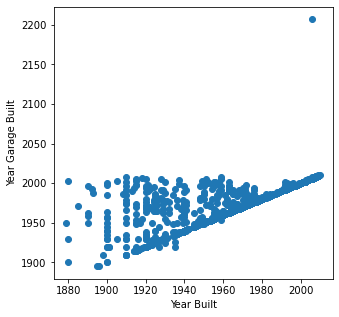

In [17]:
#The graph below shows that most garages were built the same time as the houses, 
#with some garages built later than the house
#It also shows an outlier, upon further analysis found to be typo
plt.figure(figsize=(5, 5))
plt.scatter(train_df['Year Built'], train_df['Garage Yr Blt'])
plt.xlabel('Year Built')
plt.ylabel('Year Garage Built')
plt.show()

In [18]:
train_df['Garage Yr Blt'].sort_values(ascending = False).head()

1699    2207.0
144     2010.0
1241    2010.0
589     2009.0
1796    2009.0
Name: Garage Yr Blt, dtype: float64

In [19]:
#Analyse the typo garage yr blt
train_df.loc[train_df['Garage Yr Blt'] == 2207.0][['Year Built','Year Remod/Add','Garage Yr Blt']]

,Year Built,Year Remod/Add,Garage Yr Blt
1699,2006,2007,2207.0


In [20]:
train_df.iloc[1699][['Year Built','Year Remod/Add','Garage Yr Blt']]

Year Built        2006
Year Remod/Add    2007
Garage Yr Blt     2207
Name: 1699, dtype: object

In [21]:
#Drop the row with corrupted value
train_df.drop(train_df.loc[train_df['Garage Yr Blt'] == 2207.0].index, inplace = True)


In [22]:
# Impute GarageYrBlt: wherever GarageYrBlt is null or 0, replace it with the year the house was built
train_df.loc[train_df['Garage Yr Blt'].isnull(), 'Garage Yr Blt']= train_df['Year Built']

In [23]:
#GarageCars: Size of garage in car capacity
train_df['Garage Cars'].isnull().sum()

1

In [24]:
#GarageArea: Size of garage in square feet
train_df['Garage Area'].isnull().sum()

1

In [25]:
#Garage Area and Garage Cars is null when Garage cond is None(meaning no garage)
#Therefore will impute all other null values with 0
train_df['Garage Cars'].fillna(0, inplace =True)
train_df['Garage Area'].fillna(0, inplace =True)



In [26]:
#Create new column as Garage age
train_df['Garage Age'] = 2021 - train_df['Garage Yr Blt'] 

In [27]:
train_df.drop(columns=['Garage Yr Blt'],inplace = True)

In [28]:
train_df.isnull().sum().sort_values(ascending = False).head(10)

Mas Vnr Type      21
Mas Vnr Area      21
Bsmt Full Bath     2
Bsmt Half Bath     2
Bsmt Unf SF        1
Total Bsmt SF      1
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Exposure      0
Bsmt Cond          0
dtype: int64

### Masonry

In [29]:
#Fill missing values for MasVnrType with "none"
train_df['Mas Vnr Type'].fillna("None", inplace=True)

#Fill missing values for MasVnrArea with 0
train_df['Mas Vnr Area'].fillna(0, inplace=True)


In [30]:
# Has 22 missing values. For rows where 'Mas veneer type' is NaN, is  'Mas Veneer Area' missing also?
train_df[train_df['Mas Vnr Type'].isnull()==True]['Mas Vnr Area']
# The below results show this is true

Series([], Name: Mas Vnr Area, dtype: float64)

In [31]:
#Check other null values
train_df[train_df.isnull().any(axis=1)]


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Age
616,1498,908154080,20,RL,123.0,47007,Pave,None,IR1,Lvl,...,0,None,None,None,0,7,2008,WD,284700,62.0
1327,1342,903230120,20,RM,99.0,5940,Pave,None,IR1,Lvl,...,0,None,MnPrv,None,0,4,2008,ConLD,79000,75.0


### Basement Baths

In [32]:
#Check for Bsmt Full Bath and Bsmt Half Bath
train_df[train_df['Bsmt Full Bath'].isnull()][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin SF 1','BsmtFin Type 2','Bsmt Unf SF','Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF']]


,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Bsmt Full Bath,Bsmt Half Bath,Total Bsmt SF
616,None,None,None,None,0.0,0.0,None,0.0,NaN,NaN,0.0
1327,None,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN


In [33]:
#we could see that Bsmt Full Bath and Bsmt Half Bath is null for no basement(Bsmt Cond is none, meaning no basement)
#Garage Area and Garage Cars is null when Garage cond is None(meaning no garage)
#Therefore will impute all other null values will None and 0
train_df['Bsmt Full Bath'].fillna(0, inplace =True)
train_df['Bsmt Half Bath'].fillna(0, inplace =True)
train_df['Total Bsmt SF'].fillna(0, inplace =True)
train_df['BsmtFin SF 2'].fillna(0, inplace =True)
train_df['Bsmt Unf SF'].fillna(0, inplace =True)
train_df['BsmtFin SF 1'].fillna(0, inplace =True)


In [34]:
#Check for null values
train_df.isnull().sum().sum()

0

### Porch Area

Text(0, 0.5, 'Sale Price')

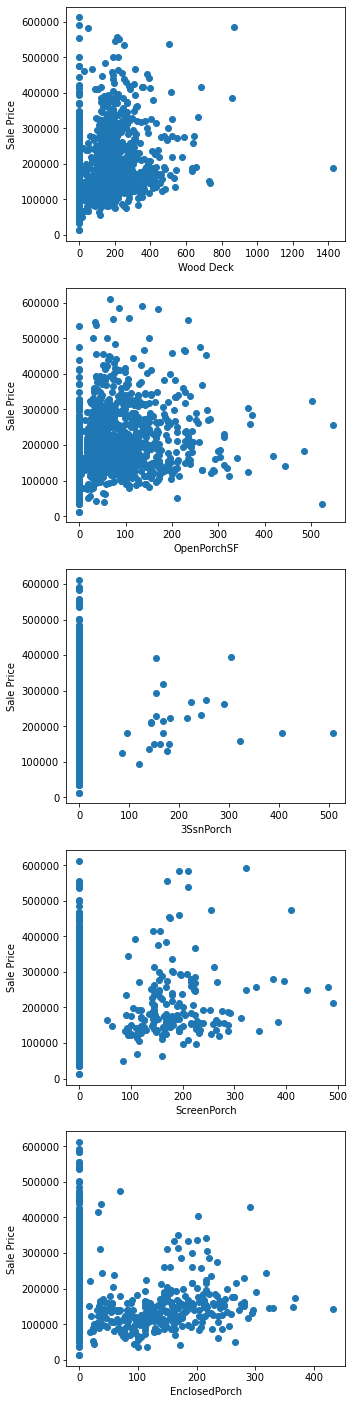

In [35]:
# Porch Area - how does each of the porch areas vary with Sale Price?
# From the graphs, it looks like the more porches of each type below that the property has, 
# the higher the Sale Price
fig = plt.figure(figsize=(5, 25))

axplot1 = fig.add_subplot(5, 1, 1)
axplot1.scatter(train_df['Wood Deck SF'], train_df['SalePrice'])
axplot1.set_xlabel('Wood Deck')
axplot1.set_ylabel('Sale Price')

axplot2 = fig.add_subplot(5, 1, 2)
axplot2.scatter(train_df['Open Porch SF'],train_df['SalePrice'])
axplot2.set_xlabel('OpenPorchSF')
axplot2.set_ylabel('Sale Price')

axplot3 = fig.add_subplot(5, 1, 3)
axplot3.scatter(train_df['3Ssn Porch'], train_df['SalePrice'])
axplot3.set_xlabel('3SsnPorch')
axplot3.set_ylabel('Sale Price')

axplot4 = fig.add_subplot(5, 1, 4)
axplot4.scatter(train_df['Screen Porch'], train_df['SalePrice'])
axplot4.set_xlabel('ScreenPorch')
axplot4.set_ylabel('Sale Price')

axplot5 = fig.add_subplot(5, 1, 5)
axplot5.scatter(train_df['Enclosed Porch'], train_df['SalePrice'])
axplot5.set_xlabel('EnclosedPorch')
axplot5.set_ylabel('Sale Price')

In [36]:
#As there are many features indicating the porch area, will combine all ceate a new variable
# OpenPorchSF: Open porch area in square feet
# WoodDeckSF: Wood deck area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet 

train_df['zero'] = 0
train_df['HasPorch'] = 0
#Check if the property has Porch area
train_df.loc[((train_df['Wood Deck SF']>train_df['zero']) | (train_df['Open Porch SF']>train_df['zero']) | (train_df['3Ssn Porch']>train_df['zero']) | 
        (train_df['Screen Porch']>train_df['zero']) | (train_df['Enclosed Porch']>train_df['zero'])), 'HasPorch'] = 1  
#Combine all the porch area and store in TotalPorchArea
train_df['TotalPorchArea'] = train_df['Wood Deck SF'] + train_df['Open Porch SF'] + train_df['3Ssn Porch'] +train_df['Screen Porch'] + train_df['Enclosed Porch']



### Property_age

In [37]:
#Create new column as Property age
train_df['Property_age'] = 2021 - train_df['Year Built'] 

In [38]:
train_df.drop(columns = ['Year Built'], inplace =True)

In [39]:
#Create new column as Remod age
train_df['Remod Age'] = 2021 - train_df['Year Remod/Add'] 

In [40]:
train_df.drop(columns = ['Year Remod/Add'], inplace =True)

In [41]:
# Drop unwanted variables
train_df = train_df.drop(['PID','zero'], 
    axis = 1)

In [42]:
# train_df.set_index('Id',inplace=True)

In [43]:
train_df.shape

(2050, 82)

In [44]:
test_df.shape

(879, 80)

# 

In [45]:
numerical_features = train_df.select_dtypes(include = np.number).columns.to_list()
numerical_features

['Id',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'Garage Age',
 'HasPorch',
 'TotalPorchArea',
 'Property_age',
 'Remod Age']

In [46]:
#Convert 'MSSubClass' column to type(str)
train_df['MS SubClass'] = train_df['MS SubClass'].astype('str')

In [47]:
train_df['MS SubClass'].dtype

dtype('O')

In [48]:
categorical_features = train_df.select_dtypes(include = 'object').columns.to_list()

categorical_features


['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [49]:
len(categorical_features)

43

In [50]:
ordinal_features = [
 'Lot Shape',
 'Land Slope',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence','Utilities']

In [51]:
train_df.replace(to_replace = {
    'Land Slope': {'Gtl': 2, 'Mod':1, 'Sev': 0},
    'Lot Shape': {'Reg':3, 'IR1':2, 'IR2': 1, 'IR3': 0},
    'Paved Drive': {'Y': 2, 'P':1, 'N': 0},
    'Pool QC': {'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'None': 0},
    'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'None': 0},
    'Bsmt Exposure': {'Gd': 4, 'Av':3, 'Mn':2, 'No': 1, 'None': 0},
    'Bsmt Qual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'None': 0},
    'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'BsmtFin Type 2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'Electrical': {'SBrkr': 4, 'FuseA': 3, 'FuseF':2, 'FuseP':1, 'Mix': 0},
    'Exter Cond': {'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po': 0},
    'Exter Qual': {'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po': 0},
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0},
    'Fireplace Qu': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'None': 0},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},
    'Garage Cond': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1, 'None': 0},
    'Garage Finish': {'Fin':3, 'RFn':2, 'Unf': 1, 'None': 0},
    'Garage Qual': {'Ex': 5, 'Gd': 4, 'TA':3, 'Fa':2, 'Po': 1,'None': 0},
    'Heating QC': {'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po': 0},
    'Kitchen Qual': {'Ex': 4, 'Gd': 3, 'TA':2, 'Fa':1, 'Po': 0},
    
}, inplace = True)

In [52]:
nominal_features = train_df.select_dtypes(include = 'object').columns.to_list()

nominal_features

['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type']

In [53]:
len(nominal_features)

23

# Exploratory Data Analysis 

In [54]:
train_df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Age,HasPorch,TotalPorchArea,Property_age,Remod Age
0,109,60,RL,0.0,13517,Pave,None,2,Lvl,AllPub,...,0,3,2010,WD,130500,45.0,1,44,45,16
1,544,60,RL,43.0,11492,Pave,None,2,Lvl,AllPub,...,0,4,2009,WD,220000,24.0,1,74,25,24
2,153,20,RL,68.0,7922,Pave,None,3,Lvl,AllPub,...,0,1,2010,WD,109000,68.0,1,52,68,14
3,318,60,RL,73.0,9802,Pave,None,3,Lvl,AllPub,...,0,4,2010,WD,174000,14.0,1,100,15,14
4,255,50,RL,82.0,14235,Pave,None,2,Lvl,AllPub,...,0,3,2010,WD,138500,64.0,1,59,121,28


In [55]:
#Lets find correlation of variables with Saleprice
correlation = train_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False)
correlation

,SalePrice
SalePrice,1.000000
Overall Qual,0.800078
Exter Qual,0.711993
Gr Liv Area,0.697173
Kitchen Qual,0.692196
Garage Area,0.650016
Garage Cars,0.647825
Total Bsmt SF,0.629090
1st Flr SF,0.618284
Bsmt Qual,0.612112


In [56]:
train_df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2050.0,1473.649756,844.007639,1.0,753.25,1483.5,2196.50,2930.0
Lot Frontage,2050.0,57.939512,33.144672,0.0,43.25,63.0,78.00,313.0
Lot Area,2050.0,10066.070244,6744.020965,1300.0,7500.00,9432.0,11514.25,159000.0
Overall Qual,2050.0,6.111220,1.426008,1.0,5.00,6.0,7.00,10.0
Overall Cond,2050.0,5.562439,1.104697,1.0,5.00,5.0,6.00,9.0
Mas Vnr Area,2050.0,98.674634,174.353604,0.0,0.00,0.0,159.50,1600.0
BsmtFin SF 1,2050.0,442.016098,461.297060,0.0,0.00,368.0,733.75,5644.0
BsmtFin SF 2,2050.0,47.959024,165.000901,0.0,0.00,0.0,0.00,1474.0
Bsmt Unf SF,2050.0,567.258537,445.045607,0.0,220.00,474.0,810.75,2336.0
Total Bsmt SF,2050.0,1057.233659,449.888282,0.0,793.00,994.0,1317.75,6110.0


We could see a lot of skewness in the data. Lets analyse one by one.

### Removing Outliers

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

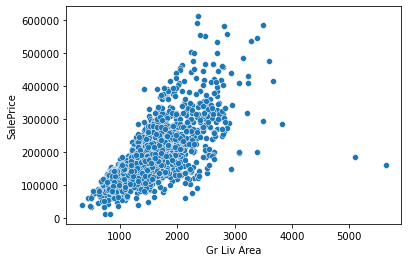

In [57]:
#Check the outliers
sns.scatterplot(x = 'Gr Liv Area',y = 'SalePrice', data = train_df)

In [58]:
#Store the index of outliers ina variable
gr_outliers_index = train_df[['Gr Liv Area', 'SalePrice']][train_df['Gr Liv Area'] > 3500].index
train_df[['Gr Liv Area', 'SalePrice']][train_df['Gr Liv Area'] > 3500]

,Gr Liv Area,SalePrice
616,3820,284700
960,5642,160000
1035,3608,475000
1885,5095,183850
1897,3672,415000


In [59]:
#drop the ouliers data
train_df.drop(gr_outliers_index,inplace=True)
train_df.shape

(2045, 82)

In [60]:
train_df[['Gr Liv Area', 'SalePrice']][train_df['Gr Liv Area'] > 3500]

,Gr Liv Area,SalePrice


<AxesSubplot:xlabel='Lot Area', ylabel='SalePrice'>

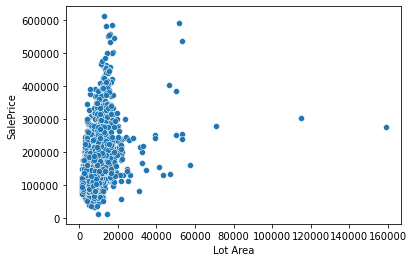

In [61]:
#Lot area also seem to have outliers
sns.scatterplot(x = 'Lot Area',y = 'SalePrice', data = train_df)

In [62]:
lotarea_outliers_index = train_df[['Lot Area','SalePrice']][train_df['Lot Area'] > 80000].sort_values('Lot Area').index
train_df[['Lot Area','SalePrice']][train_df['Lot Area'] > 50000].sort_values('Lot Area')

,Lot Area,SalePrice
1726,50102,250764
1571,50271,385000
1964,51974,591587
1843,53107,240000
1052,53227,256000
823,53504,538000
745,57200,160000
1854,70761,280000
694,115149,302000
471,159000,277000


In [63]:
#drop the ouliers data
train_df.drop(lotarea_outliers_index,inplace=True)
train_df.shape

(2043, 82)

## Correlation

In [64]:
correlation = train_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False)


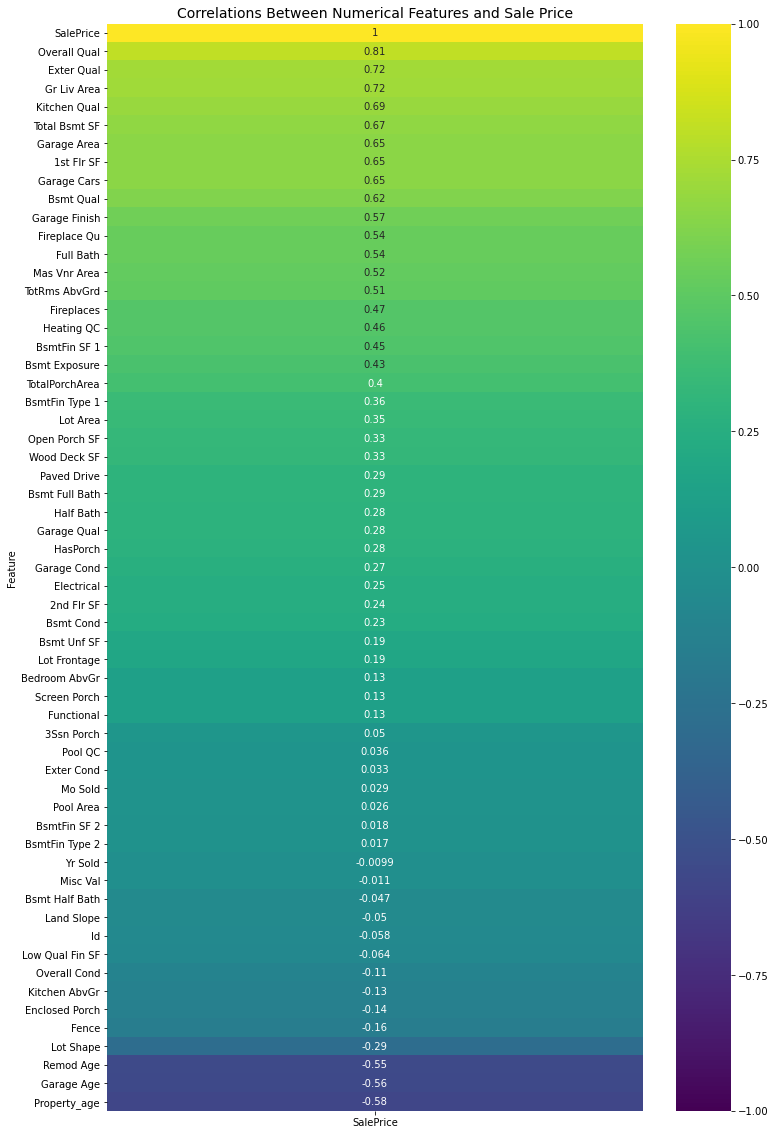

In [65]:
plt.figure(figsize=(12, 20))
sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sale Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

The correlation heatmap above shows the features that have the highest correlation with SalePrice. Overall Qual has the highest correlation with saleprice. There are also some collinear features which will be dropped after deep analysis.

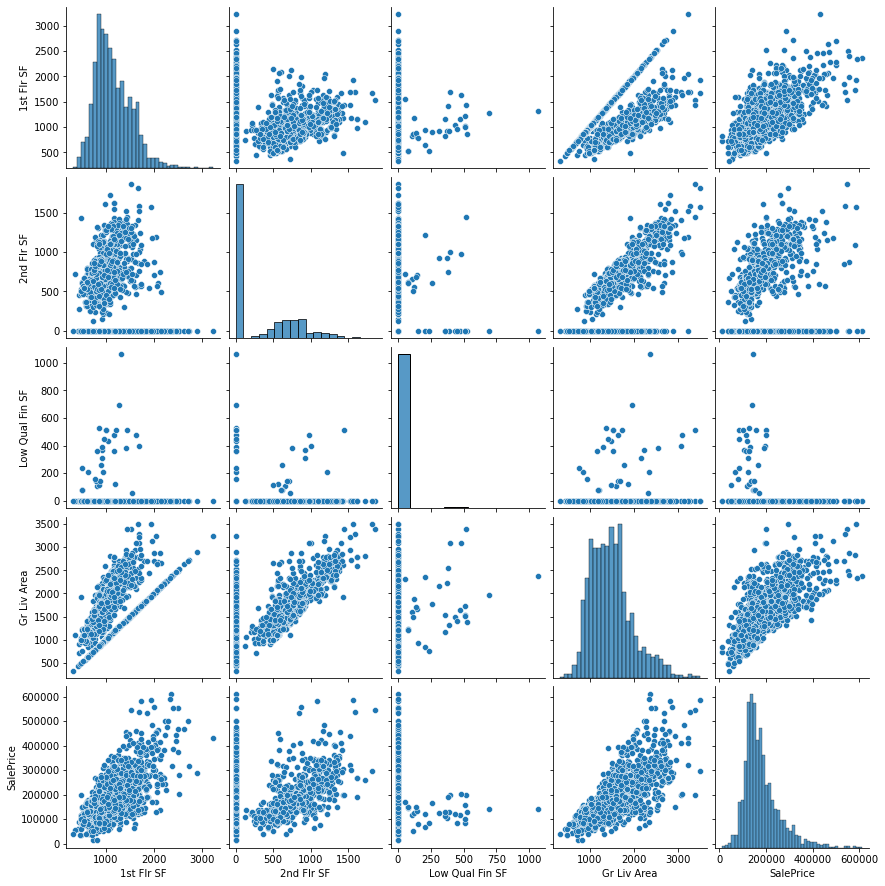

In [66]:
#Lets find the correlation of other squarefeet varaibles with the saleprice
sns.pairplot(train_df[['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area',
                       'SalePrice']])

In [67]:
train_df[['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Total Bsmt SF',
                       'SalePrice']].corr()

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Total Bsmt SF,SalePrice
1st Flr SF,1.000000,-0.290970,-0.014991,0.522412,0.809124,0.651065
2nd Flr SF,-0.290970,1.000000,-0.000345,0.657750,-0.238791,0.242714
Low Qual Fin SF,-0.014991,-0.000345,1.000000,0.091586,-0.023733,-0.063632
Gr Liv Area,0.522412,0.657750,0.091586,1.000000,0.418519,0.717080
Total Bsmt SF,0.809124,-0.238791,-0.023733,0.418519,1.000000,0.668597
SalePrice,0.651065,0.242714,-0.063632,0.717080,0.668597,1.000000


Low Qual Fin SF doesn't have strong correlation with the SalePrice. So it will also be dropped.

1st Flr Sf and Total Bsmt SF have strong correaltion(the first floor is on top of the basement, so they likely to have similar size). Therefore 1st Flr Sf will be dropped.

In [68]:
train_df.drop(columns = ['Low Qual Fin SF'], inplace = True)
train_df.shape

(2043, 81)

In [69]:
#Lets find the correlation between the basement variables and saleprice
train_df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','SalePrice']].corr()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,SalePrice
BsmtFin SF 1,1.000000,-0.049709,-0.500862,0.490207,0.450556
BsmtFin SF 2,-0.049709,1.000000,-0.231076,0.095273,0.018204
Bsmt Unf SF,-0.500862,-0.231076,1.000000,0.437503,0.187991
Total Bsmt SF,0.490207,0.095273,0.437503,1.000000,0.668597
SalePrice,0.450556,0.018204,0.187991,0.668597,1.000000


In [70]:
# Since 'BsmtFin SF 2 have low correlation with saleprice, will drop it.
train_df.drop(columns = ['BsmtFin SF 2'], inplace = True)
train_df.shape

(2043, 80)

In [71]:
train_df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood De

In [72]:
#Lets analyse the Garage varaibels
train_df[['Garage Area','Garage Cars','Garage Qual','Garage Cond','Garage Finish','SalePrice']].corr()

,Garage Area,Garage Cars,Garage Qual,Garage Cond,Garage Finish,SalePrice
Garage Area,1.000000,0.897897,0.563020,0.547736,0.519756,0.654277
Garage Cars,0.897897,1.000000,0.573184,0.560717,0.578277,0.649265
Garage Qual,0.563020,0.573184,1.000000,0.952262,0.492998,0.281401
Garage Cond,0.547736,0.560717,0.952262,1.000000,0.485340,0.265458
Garage Finish,0.519756,0.578277,0.492998,0.485340,1.000000,0.565960
SalePrice,0.654277,0.649265,0.281401,0.265458,0.565960,1.000000


Garage Cars and Garage Area (garage area increases with increasing number of cars that can fit in it).So Garage Cars will be dropped.

In [73]:
train_df.drop(columns = ['Garage Cars'], inplace = True)
train_df.shape

(2043, 79)

In [74]:
#View all the porch related variables
train_df[['Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch','TotalPorchArea','HasPorch','SalePrice']].head(20)

,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Enclosed Porch,TotalPorchArea,HasPorch,SalePrice
0,0,44,0,0,0,44,1,130500
1,0,74,0,0,0,74,1,220000
2,0,52,0,0,0,52,1,109000
3,100,0,0,0,0,100,1,174000
4,0,59,0,0,0,59,1,138500
5,0,0,0,0,0,0,0,190000
6,0,44,0,0,0,44,1,140000
7,0,0,0,0,0,0,0,142000
8,0,324,0,0,0,324,1,112500
9,335,0,0,0,0,335,1,135000


In [75]:
train_df[['Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch','TotalPorchArea','HasPorch','SalePrice']].corr()

,Wood Deck SF,Open Porch SF,3Ssn Porch,Screen Porch,Enclosed Porch,TotalPorchArea,HasPorch,SalePrice
Wood Deck SF,1.000000,0.038071,-0.010485,-0.065333,-0.114727,0.753782,0.329137,0.325921
Open Porch SF,0.038071,1.000000,-0.006539,0.052324,-0.075398,0.433463,0.323210,0.334068
3Ssn Porch,-0.010485,-0.006539,1.000000,-0.029678,-0.032279,0.125859,0.046320,0.049667
Screen Porch,-0.065333,0.052324,-0.029678,1.000000,-0.068902,0.297514,0.129724,0.125630
Enclosed Porch,-0.114727,-0.075398,-0.032279,-0.068902,1.000000,0.225612,0.170014,-0.135298
TotalPorchArea,0.753782,0.433463,0.125859,0.297514,0.225612,1.000000,0.517714,0.402876
HasPorch,0.329137,0.323210,0.046320,0.129724,0.170014,0.517714,1.000000,0.276326
SalePrice,0.325921,0.334068,0.049667,0.125630,-0.135298,0.402876,0.276326,1.000000


In [76]:
#Drop these variables as they can be represented with total porch area which also has got high correaltion
train_df = train_df.drop(['Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch','HasPorch'], 
    axis = 1)
train_df.shape

(2043, 73)

In [77]:
#Pool area and Misc val correlation
train_df[['Pool Area','Misc Val', 'SalePrice']].corr()

,Pool Area,Misc Val,SalePrice
Pool Area,1.000000,0.026208,0.026337
Misc Val,0.026208,1.000000,-0.010507
SalePrice,0.026337,-0.010507,1.000000


In [78]:
#Low correlation and dropped
train_df.drop(columns = ['Pool Area','Misc Val'], inplace = True)
train_df.shape

(2043, 71)

In [79]:
#Lets analyse the relationship between year variables
train_df[['Mo Sold', 'Yr Sold','Property_age','Remod Age','Garage Age','SalePrice']].corr()

,Mo Sold,Yr Sold,Property_age,Remod Age,Garage Age,SalePrice
Mo Sold,1.000000,-0.145953,0.006186,-0.011061,-0.000284,0.029253
Yr Sold,-0.145953,1.000000,0.005661,-0.044389,0.006187,-0.009861
Property_age,0.006186,0.005661,1.000000,0.631184,0.860314,-0.584485
Remod Age,-0.011061,-0.044389,0.631184,1.000000,0.650431,-0.551937
Garage Age,-0.000284,0.006187,0.860314,0.650431,1.000000,-0.559447
SalePrice,0.029253,-0.009861,-0.584485,-0.551937,-0.559447,1.000000


In [80]:
#Low correlation and dropped
train_df.drop(columns = ['Mo Sold', 'Yr Sold'], inplace = True)
train_df.shape

(2043, 69)

In [81]:
#Lets analyse the relationship between bath variables
train_df[['Half Bath', 'Full Bath', 'Bsmt Full Bath', 'Bsmt Half Bath', 'SalePrice']].corr()

,Half Bath,Full Bath,Bsmt Full Bath,Bsmt Half Bath,SalePrice
Half Bath,1.000000,0.150872,-0.027509,-0.048295,0.282312
Full Bath,0.150872,1.000000,-0.010431,-0.062655,0.535883
Bsmt Full Bath,-0.027509,-0.010431,1.000000,-0.148603,0.290094
Bsmt Half Bath,-0.048295,-0.062655,-0.148603,1.000000,-0.046942
SalePrice,0.282312,0.535883,0.290094,-0.046942,1.000000


In [82]:
#Low correlation with target variable
train_df.drop(columns = ['Bsmt Half Bath'], inplace = True)
train_df.shape

(2043, 68)

In [83]:
#Other variables with no correaltion will also be dropped
train_df.drop(columns = ['Street','Utilities','Condition 2','Roof Matl','Heating'], inplace = True)
train_df.shape

(2043, 63)

In [84]:
nominal_features = train_df.select_dtypes(include = 'object').columns.to_list()
nominal_features

['MS SubClass',
 'MS Zoning',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type']

In [85]:
train_df = pd.get_dummies(data = train_df, columns = nominal_features)
train_df.shape

(2043, 199)

In [86]:
pd.set_option('display.max_columns', 300)
train_df.head()

,Id,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,SalePrice,Garage Age,TotalPorchArea,Property_age,Remod Age,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Alley_Grvl,Alley_None,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,0.0,13517,2,2,6,8,289.0,3,2,3,3,1,6,533.0,1,192.0,725.0,4,4,725,754,1479,0.0,2,1,3,1,3,6,7,0,0,2,475.0,3,3,2,0,0,130500,45.0,44,45,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,544,43.0,11492,2,2,7,5,132.0,3,2,4,3,1,6,637.0,1,276.0,913.0,4,4,913,1209,2122,1.0,2,1,4,1,3,8,7,1,3,2,559.0,3,3,2,0,0,220000,24.0,74,25,24,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [87]:
train_df.to_csv('datasets/train_clean.csv')

In [88]:
train_df.shape

(2043, 199)